<a href="https://colab.research.google.com/github/thgemanuel/Etapa-1_Topicos_especiais_em_IC/blob/main/Trabalho_final_Etapa_2_IA_Thiago_Emanuel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Seleção e apresentação da base de dados**

1 - Base de dados *Predict Test Scores of students* 

> Este conjunto de dados consiste nas informações sobre um teste escrito por alguns alunos. Inclui características como: Ambiente escolar, tipo escolar, sexo, notas de pré-vestibulares, entre outros.

> ‎Tem o objetivo de obter diversas abordagens na previsão das pontuações pós-teste dos alunos.

> Possui 11 colunas.

> Realizar o procesos de regressão, com o objetivo de prever uma nota pós teste de um aluno.

*   [Kaggle - Predict Test Scores of students](https://www.kaggle.com/kwadwoofosu/predict-test-scores-of-students)





In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

from sklearn.model_selection import train_test_split


In [ ]:
uploaded = files.upload()
ts = pd.read_csv(io.BytesIO(uploaded['test_scores.csv']))

Saving test_scores.csv to test_scores (1).csv


# Modelagem dos dados

In [ ]:
df2 = ts.drop(['classroom','student_id'], axis = 1)
df2.head()

,school,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
0,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,62.0,72.0
1,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,66.0,79.0
2,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0
3,ANKYI,Urban,Non-public,Standard,20.0,Female,Does not qualify,61.0,77.0
4,ANKYI,Urban,Non-public,Standard,20.0,Male,Does not qualify,64.0,76.0


In [ ]:
features = pd.get_dummies(df2)
features.rename(columns = {'school_type_Non-public' : 'school_type_Non_public','lunch_Does not qualify':'lunch_Does_not_qualify', 'lunch_Qualifies for reduced/free lunch':'lunch_Qualifies_for_reduced/free_lunch'}, inplace = True)
features.head()

,n_student,pretest,posttest,school_ANKYI,school_CCAAW,school_CIMBB,school_CUQAM,school_DNQDD,school_FBUMG,school_GJJHK,school_GOKXL,school_GOOBU,school_IDGFP,school_KFZMY,school_KZKKE,school_LAYPA,school_OJOBU,school_QOQTS,school_UAGPU,school_UKPGS,school_UUUQX,school_VHDHF,school_VKWQH,school_VVTVA,school_ZMNYA,school_ZOWMK,school_setting_Rural,school_setting_Suburban,school_setting_Urban,school_type_Non_public,school_type_Public,teaching_method_Experimental,teaching_method_Standard,gender_Female,gender_Male,lunch_Does_not_qualify,lunch_Qualifies_for_reduced/free_lunch
0,20.0,62.0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
1,20.0,66.0,79.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
2,20.0,64.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0
3,20.0,61.0,77.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0
4,20.0,64.0,76.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,1,1,0


In [ ]:
X = features.drop('posttest', axis=1)
y = features["posttest"]

Criando os conjuntos de dados de treinamento e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Funcao para medir acurácia e avaliar metodos de regressão

In [ ]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

def test_score(y_test, y_pred):
    acuracia = explained_variance_score(y_test, y_pred) * 100
    mae = round(mean_absolute_error(y_test, y_pred), 2)
    print(f"""Acurácia: {acuracia:.2f}""")
    print(f"""Erro médio absoluto: {mae:.2f}""")
  
    return acuracia

In [ ]:
accuracy_scores = np.zeros(3, dtype="float64")

# Métodos

Regressao Linear

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression

regRL = LinearRegression().fit(X_train, y_train)
ypLR = regRL.predict(X_test)
accuracy_scores[0]= test_score(y_test, ypLR)

Acurácia: 95.00
Erro médio absoluto: 2.50


SVR (SVM para regressão)

In [ ]:
from sklearn.svm import SVR

regSVR = SVR().fit(X_train, y_train)
ypSVR = regSVR.predict(X_test)
accuracy_scores[1]= test_score(y_test, ypSVR)

Acurácia: 91.42
Erro médio absoluto: 3.38


MPL (Redes neurais)

In [ ]:
from sklearn.neural_network import MLPClassifier

regMLP = MLPClassifier(alpha=0.01,max_iter=2000, hidden_layer_sizes=20,activation='logistic')
regMLP.fit(X_train, y_train)

ypMLP=regMLP.predict(X_test)

accuracy_scores[2]= test_score(y_test, ypMLP)


Acurácia: 93.63
Erro médio absoluto: 2.78


# Avaliação dos algorítmos

Grafico para avaliação da acurácia dos 3 algoritmos

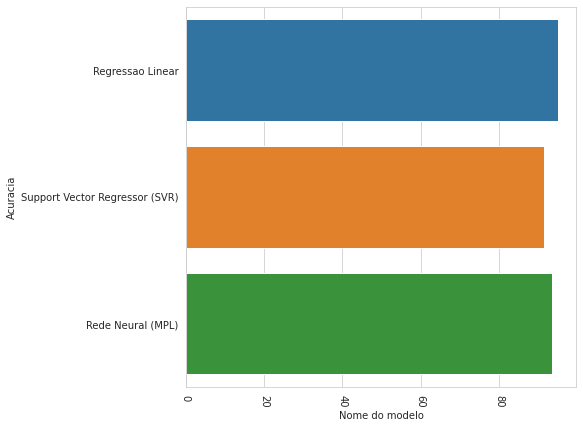

In [ ]:
sns.set_style('whitegrid')
models = ["Regressao Linear","Support Vector Regressor (SVR)","Rede Neural (MPL)"]

plt.figure(figsize=(7, 7))
sns.barplot(x=accuracy_scores, y=models)


plt.xlabel("Nome do modelo")
plt.xticks(rotation = -90)
plt.ylabel("Acuracia")

plt.show()

Grafico para avaliação do erro médio absoluto dos 3 algoritmos

<Figure size 216x216 with 0 Axes>

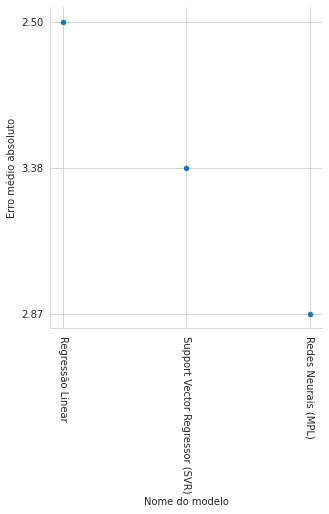

In [ ]:
sns.set_style('whitegrid')
models = ["Regressão Linear","Support Vector Regressor (SVR)","Redes Neurais (MPL)"]

mae = ["2.50","3.38","2.87"]

plt.figure(figsize=(3, 3))
sns.relplot(x=models, y=mae)

plt.xlabel("Nome do modelo")
plt.xticks(rotation = -90)
plt.ylabel("Erro médio absoluto")

plt.show()